Вариационные автоэнкодеры (VAE). Что это такое? | #28 нейросети на Python

In [2]:

import numpy as np
import os
from tensorflow import keras
from tensorflow.keras.layers import Dense, SimpleRNN, Input, Embedding,LSTM, GRU, Flatten, Dropout, Bidirectional, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [11]:
input_img = Input((28, 28, 1))
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
encoded = Dense(2, activation='linear')(x)

input_enc = Input(shape=(2,))
d = Dense(64, activation='relu')(input_enc)
d = Dense(28*28, activation='sigmoid')(d)
decoder = Reshape((28, 28, 1))(d)

encoder = keras.Model(input_img, encoded, name= 'encoder')
decoder = keras.Model(input_enc, decoder, name = 'decoder')
autoencoder = keras.Model(input_img, decoder(encoder(input_img)), name='autoencoder')
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
autoencoder.fit(x_train, x_train,
    epochs = 10,
    batch_size = 64,
    shuffle= True)

Epoch 1/10


2025-01-04 11:00:39.363513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0790
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.1074
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1082
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1082
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1078
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1083
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1083
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.1091
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.1084
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.1093


In [13]:
h = encoder.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


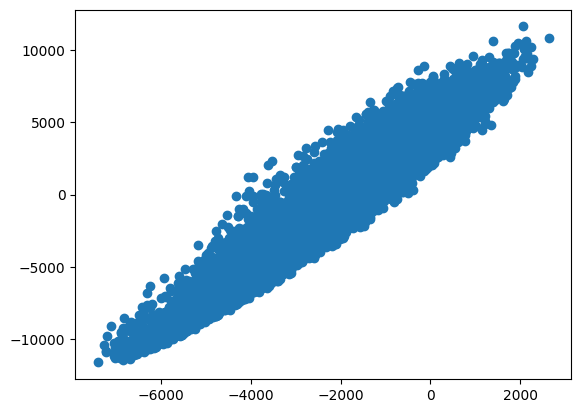

In [15]:
a = plt.scatter(h[:, 0], h[:,1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


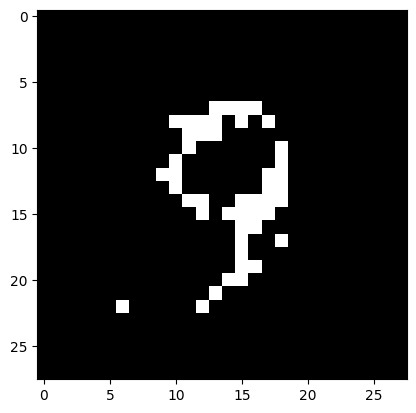

In [20]:
img = decoder.predict(np.expand_dims([40,450], axis=0))
plt.imshow(img.squeeze(), cmap='gray')